<h1><center><strong><font color="chillipepper">Lab Session 1: An Introduction à l'analyse des données textuelles</font></strong></center></h1>


<center>
Année 2023 
</center>
------------------------

# Vue d'ensemble
Avant tout algortihme de machine learning, le NLP est une question de données: nature de la données, distribution de la donnée, préparation et présentation de la donnée. Le but de ce travail est de vous familiriser avec la manipulation de la donnée textuelle.

## Prérequis
- Python
- Pandas

## Ressources
- NLTK: https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS: https://pandas.pydata.org/docs/getting_started/index.html
- SPACY: https://spacy.io/usage/spacy-101

## Base de données
1. [BBC News Classification dataset](https://www.kaggle.com/c/learn-ai-bbc/overview)
2. [Amazon Review dataset](https://huggingface.co/datasets/amazon_reviews_multi)

## Questions
1. Préprocessing basique
- [ ] Ouvrez la base de données et générez des statistiques concernant les articles.
- [ ] Generez des statistiques concernant les annotateurs.
2. Word-level preprocessing
- Separez les articles en liste de mots. Le vocabulaire final compte t-il combien de mots différents?
- Séparez les articles en utilisant des tokenizers de NLTK que vous connaissez. Quelle est la différence en terme du nombre de mots? Selon vous qu'est-ce qui a changé?
3. Regex (expressions régulières)
- [ ] Utilisez les regex pour détecter les nombres.
- [ ] Calculez le pourcentage de nombres dans chaque article.
- [ ] Existe t-il une relation entre le nombre le pourcentage de nombres et la taille de l'article?
4. NLP pipeline
- [ ] Séparez à nouveau les articles en tokens en utilisant Spacy
- [ ] Lemmatisez avec Spacy
- [ ] POS avec spacy
- [ ] NER avec spacy
5. Topic modelling
- [ ] Utilisez Gensim LDA pour effectuer le topic modelling
- [ ] Utilisez pyLDAvis pour visualiser les topics

# <font color="chillipepper">**Imports et Installations** 📂</font>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip3 install datasets

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344566 sha256=9a2d4a2d9213fcfd8b5d4c020939e7a8673efad310e0b41dc18e8e314359d922
  Stored in directory: C:\Users\mbial\AppData\Local\Temp\pip-ephem-wheel-cache-kocqjhrf\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=0038522bf991d6962e24408c9f34a8

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.0.15 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.5 which is incompatible.
spacy 3.3.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.5 which is incompatible.
aiohttp 3.7.3 requires chardet<4.0,>=2.0, but you have chardet 4.0.0 which is incompatible.


  Using cached datasets-2.10.1-py3-none-any.whl (469 kB)
  Using cached fsspec-2023.1.0-py3-none-any.whl (143 kB)
  Using cached huggingface_hub-0.12.1-py3-none-any.whl (190 kB)
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.56.0
    Uninstalling tqdm-4.56.0:
      Successfully uninstalled tqdm-4.56.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.8.3
    Uninstalling fsspec-0.8.3:
      Successfully uninstalled fsspec-0.8.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.3
    Uninstalling dill-0.3.3:
      Successfully uninstalled dill-0.3.3
  Attempting uninstall: huggingface-hub
    Found existing

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.1 requires pyqt5<5.13, which is not installed.
spyder 4.2.1 requires pyqtwebengine<5.13, which is not installed.
conda 4.13.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
transformers 4.6.1 requires huggingface-hub==0.0.8, but you have huggingface-hub 0.12.1 which is incompatible.
spacy 3.3.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.5 which is incompatible.


# <font color="chillipepper">**Exploration basique** 📊</font>

In [4]:
import pandas as pd
import numpy as np
from functools import reduce
from operator import add
from termcolor import colored
import matplotlib.pyplot as plt

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from pandas_profiling import ProfileReport

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\site-packages\numba\core\types\__init__.py:108: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more detail

In [6]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (2225, 4)


C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

In [7]:
df.drop_duplicates(['content'], inplace=True)

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


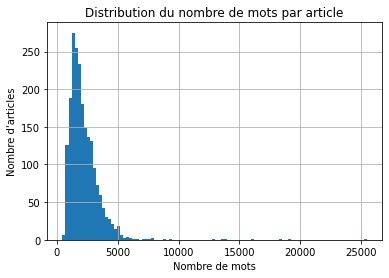

In [8]:
## Distribution du nombre de mots par articles
df['content'].apply(len).plot(kind='hist', bins=100)
plt.grid()
plt.ylabel("Nombre d'articles")
plt.xlabel("Nombre de mots")
plt.title("Distribution du nombre de mots par article");

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


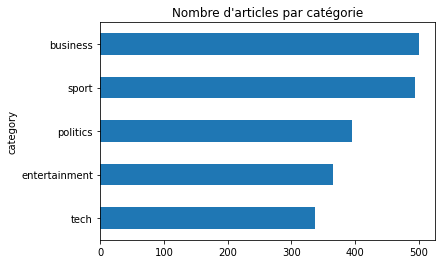

In [9]:
df.groupby('category')['content'].count().sort_values().plot(kind='barh')
plt.title( "Nombre d'articles par catégorie");

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


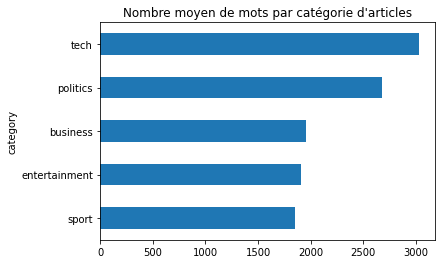

In [10]:
df['nb_words'] = df['content'].apply(len)
df.groupby('category')['nb_words'].mean().sort_values().plot(kind='barh')
plt.title( "Nombre moyen de mots par catégorie d'articles");

In [11]:
df['title_len'] = df.title.apply(lambda x: len(x.split(' ')) )
df['content_len'] = df.content.apply(lambda x: len(x.split(' ')) )

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


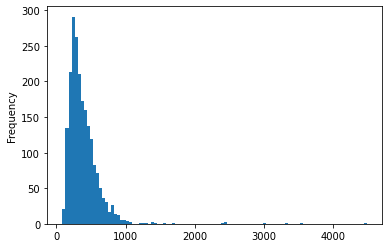

In [12]:
df['content_len'].plot(kind='hist', bins=100);

In [13]:
profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <font color="chillipepper">**Preprocessing**</font>

In [14]:
##Corpus 1
# Liste de mots séparés par des espaces
arr = df.content.apply(lambda x: x.split(" ")).array
arr = [ x for X in arr for x in X]
corpus1 = set(arr)
print(len(corpus1), len(arr))

64779 804854


C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [15]:
from nltk.tokenize import TreebankWordTokenizer,ToktokTokenizer, TweetTokenizer
from tqdm.notebook import tqdm

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb 
for tok in tqdm(tokenizers):
  print('tokenizer: %s' % (tok))
  arr = df.content.apply(lambda x: tok.tokenize(x)).array
  arr = [ x for X in arr for x in X]
  print('Les 50 premiers tokens: %s' % (arr[:50]) )
  print("Taille du vocabulaire: {0} avec {1} tokenizer".format(len(set(arr)), tok))
  print('='*100)  

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


  0%|          | 0/3 [00:00<?, ?it/s]

tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x00000152B8ECA5E0>
Les 50 premiers tokens: ['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm', ',', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'Google', ',', 'benefited', 'from', 'sales', 'of', 'high-speed', 'internet', 'connections', 'and', 'higher']
Taille du vocabulaire: 45705 avec <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x00000152B8ECA5E0> tokenizer
tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x00000152B8ECA610>
Les 50 premiers tokens: ['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£', '600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm'

# <font color="chillipepper">**Regex**</font>

In [54]:
## Determinons les valeurs numérique en utilisant les regex
import re
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # année entre 1800 et 2099
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']
for prog, nb_type in zip(progs, nb_types):
  df[nb_type] = df['content'].apply(lambda x: len(prog.split(x))-1).array
df.head()

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  nb_words  title_len  \
0   Quarterly profits at US media giant TimeWarne...      2525          6   
1   The dollar has hit its highest level against ...      2219          5   
2   The owners of embattled Russian oil giant Yuk...      1517          6   
3   British Airways has blamed high fuel prices f...      2367          6   
4   Shares in UK drinks and food firm Allied Dome...      1535          5   

   content_len  ints  floats  percents  years  
0          421    30      24         8      4  
1          383     7       5         0      2  
2          262     7       5         0      0  
3          406    37      30         8      4  
4          264    18      11         3      1

In [62]:
percent_name = ["".join([t, '%']) for t in nb_types]
for per,t in zip(percent_name, nb_types):
    df[per] = df[t]*100/df['content_len']
df.head()

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  nb_words  title_len  \
0   Quarterly profits at US media giant TimeWarne...      2525          6   
1   The dollar has hit its highest level against ...      2219          5   
2   The owners of embattled Russian oil giant Yuk...      1517          6   
3   British Airways has blamed high fuel prices f...      2367          6   
4   Shares in UK drinks and food firm Allied Dome...      1535          5   

   content_len  ints  floats  percents  years     ints%   floats%  percents%  \
0          421    30      24         8      4  7.125891  5.700713   1.900238   
1          383     7       5         0      2  1.827676  1.305483   0.000000   
2          262     7       5         0      0  2.671756  1.908397   0.000000   
3          406    37      30         8      4  9.113300  7.389163   1.970443   
4          264    18      11         3      1  6.818182  4.166667   1.136364   

     years%  
0  0.950119  
1  0.522193  
2  0.000000  
3  0.985222  
4  0.378788

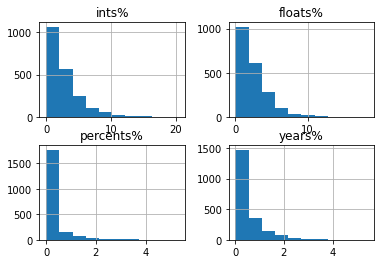

In [64]:
df[percent_name].hist();

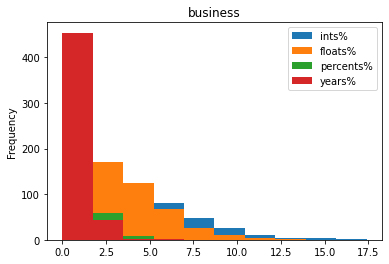

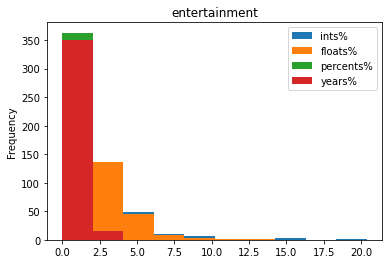

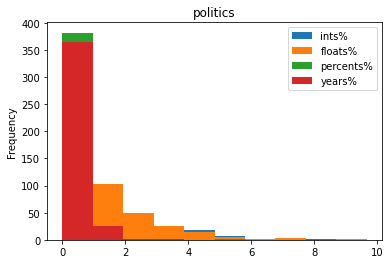

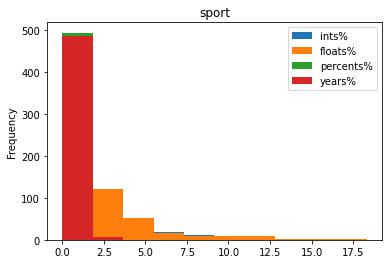

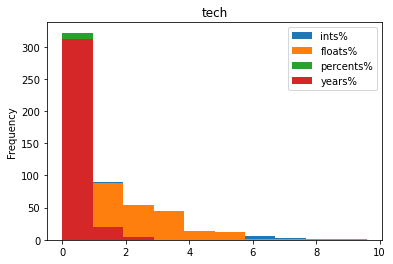

In [66]:
categories = list(df.category.drop_duplicates().values)
for category in categories:
  # flitrer par catégorie
  is_category = df['category']==category
  df1 = df[is_category]
  
  ax = df1[percent_name].plot(kind='hist',subplots=False,sharex=True,sharey=True,title='%s' % (category))

# <font color="chillipepper">**NLP Pipeline**</font>

In [23]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# instancier le tokenizer
tokenizer = Tokenizer(nlp.vocab)

arr = df.content.apply(lambda x: [w.text for w in tokenizer(x)]).array
arr = [ x for X in arr for x in X]
print("Taille du vocabulaire avec de tokenizer de spacy: {}".format(len(set(arr))))


tokenization_sample = df.content.head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Exemple de tokens:\n {}".format(tokenization_sample))

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


Taille du vocabulaire avec de tokenizer de spacy: 64784
Exemple de tokens:
 0    [ , Quarterly, profits, at, US, media, giant, ...
1    [ , The, dollar, has, hit, its, highest, level...
2    [ , The, owners, of, embattled, Russian, oil, ...
3    [ , British, Airways, has, blamed, high, fuel,...
4    [ , Shares, in, UK, drinks, and, food, firm, A...
Name: content, dtype: object


### POS avec spacy

In [24]:
import spacy
from spacy import displacy
for title in df.title.head()[:2]:
  doc = nlp(title)
  displacy.render(doc, style="dep", jupyter=True)

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\runpy.py:194: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  return _run_code(code, main_globals, None,


C:\Users\mbial\anaconda3\lib\runpy.py:194: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  return _run_code(code, main_globals, None,


### NER avec Spacy

In [87]:
from spacy import displacy
for title in df.content.head()[:1]:
  doc = nlp(title)
  displacy.render(doc, style="ent", jupyter=True)

In [86]:
for title in df.content.head()[:1]:
  doc = nlp(title.lower())
  displacy.render(doc, style="ent", jupyter=True)

# <font color="chillipepper">**Topic Modelling**</font>

In [17]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached pandas-1.5.3-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached funcy-1.18-py2.py3-none-any.whl (33 kB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.1
    Uninstalling pandas-1.2.1:
      Successfully uninstalled pandas-1.2.1


In [18]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()

text_data = list(df.content.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Quarterly', 'profits', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '1.13bn', '£600m', 'three', 'months', 'December', '639m', 'year-earlier.', 'firm', 'one', 'biggest', 'investors', 'Google', 'benefited', 'sales', 'high-speed', 'internet', 'connections', 'higher', 'advert', 'sales.', 'TimeWarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '11.1bn', '10.9bn.', 'profits', 'buoyed', 'one-off', 'gains', 'offset', 'profit', 'dip', 'Warner', 'Bros', 'less', 'users', 'AOL.', 'Time', 'Warner', 'said', 'Friday', 'owns', '8', 'search-engine', 'Google.', 'internet', 'business', 'AOL', 'mixed', 'fortunes.', 'lost', '464,000', 'subscribers', 'fourth', 'quarter', 'profits', 'lower', 'preceding', 'three', 'quarters.', 'However', 'company', 'said', 'AOL', "'s", 'underlying', 'profit', 'exceptional', 'items', 'rose', '8', 'back', 'stronger', 'internet', 'advertising', 'revenues.', 'hopes', 'increase', 'subscribers', 'offering', 'online', 'service', 'free', 'TimeWarner', 'internet', 

In [19]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\mbial\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mbial\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
